# Stock Price Prediction using Machine Learning in Python
I will build a model that will predict a signal that indicates whether buying a particular stock will be helpful or not by using ML.

### Import Libraries

In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing  import StandardScaler
 from sklearn.linear_model import LogisticRegression
 from sklearn.svm import SVC
 from xgboost import XGBClassifier
 from sklearn import metrics

 import warnings
 warnings.filterwarnings('ignore')

### Import dataset
dataset: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020

In [2]:
# Loading the data set from system drive
from google.colab import files
uploaded = files.upload()
# Choose the data to uploafd from the file manager

Saving TSLA.csv to TSLA.csv


In [4]:
import io
# Now using io i will access the data where it is stored
df = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']),encoding = 'latin-1').dropna(axis = 1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


I will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2010 to 31st December 2020 which is for 8 years for the Tesla stocks.

In [5]:
# Shape of the Data
df.shape

(2416, 7)

In [6]:
# Now we get the summary of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
# Info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


# Exploratory Data Analysis
While performing the EDA of the Tesla Stock Price data I will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

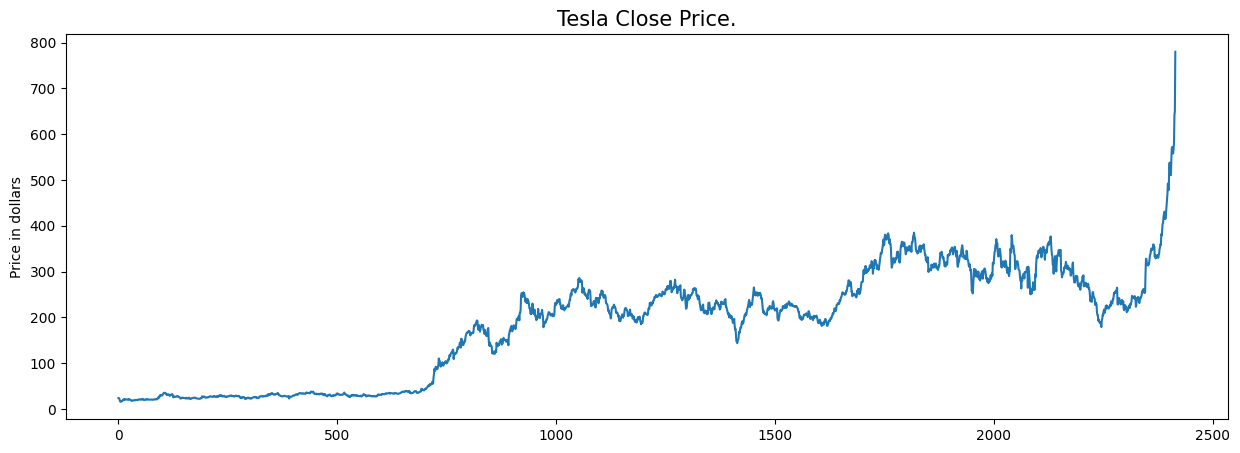

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close Price.', fontsize = 15)
plt.ylabel('Price in dollars')
plt.show()
by = 'Joseph Wathome'

The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


if we observe we can see that 'Close' adn 'Adj Close' are the same lets check if if its true in every row

In [10]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

therefore we have Redundant data in the data set, lets drop this column b4 further analysis

In [11]:
df = df.drop(['Adj Close'], axis =1)

Check for null values

In [12]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

I will plot the distribution plot for the continous features given in the dataset

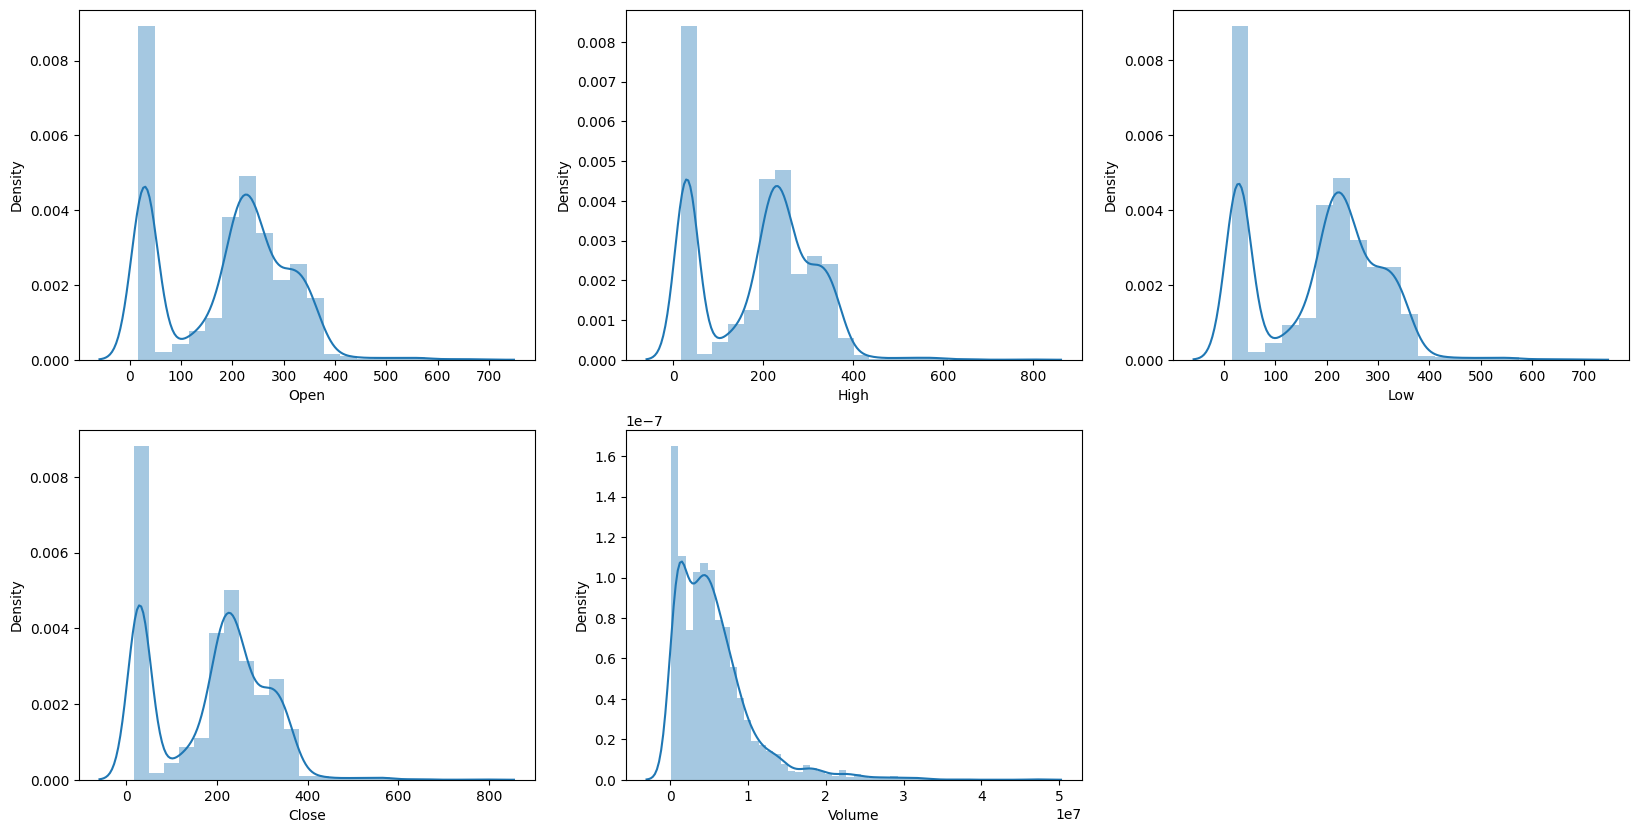

In [13]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
  plt.subplot(2, 3, i+1)
  sns.distplot(df[col])

plt.show()

In the distribution plot of OHLC data, I can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

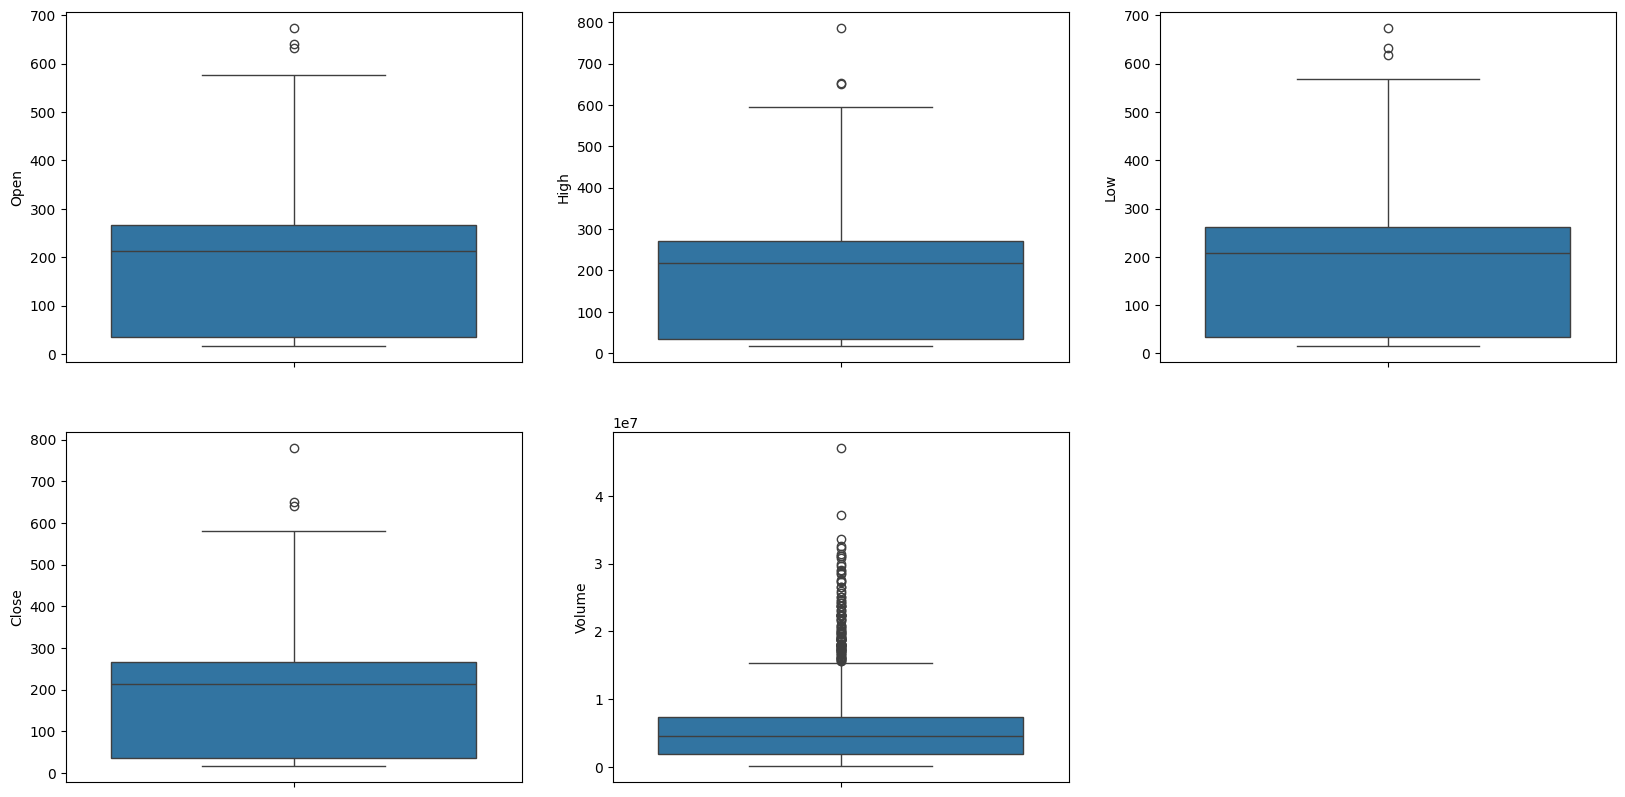

In [14]:
# Boxplot
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3, i+1)
  sns.boxplot(df[col])

plt.show()

From the above boxplots, I can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

## Feature Engineering


In [15]:
splitted = df['Date'].str.split('-', expand = True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [16]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


A quarter is defined as a group of 3 months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why I have added this feature because this can be a helpful feature for the learning model.

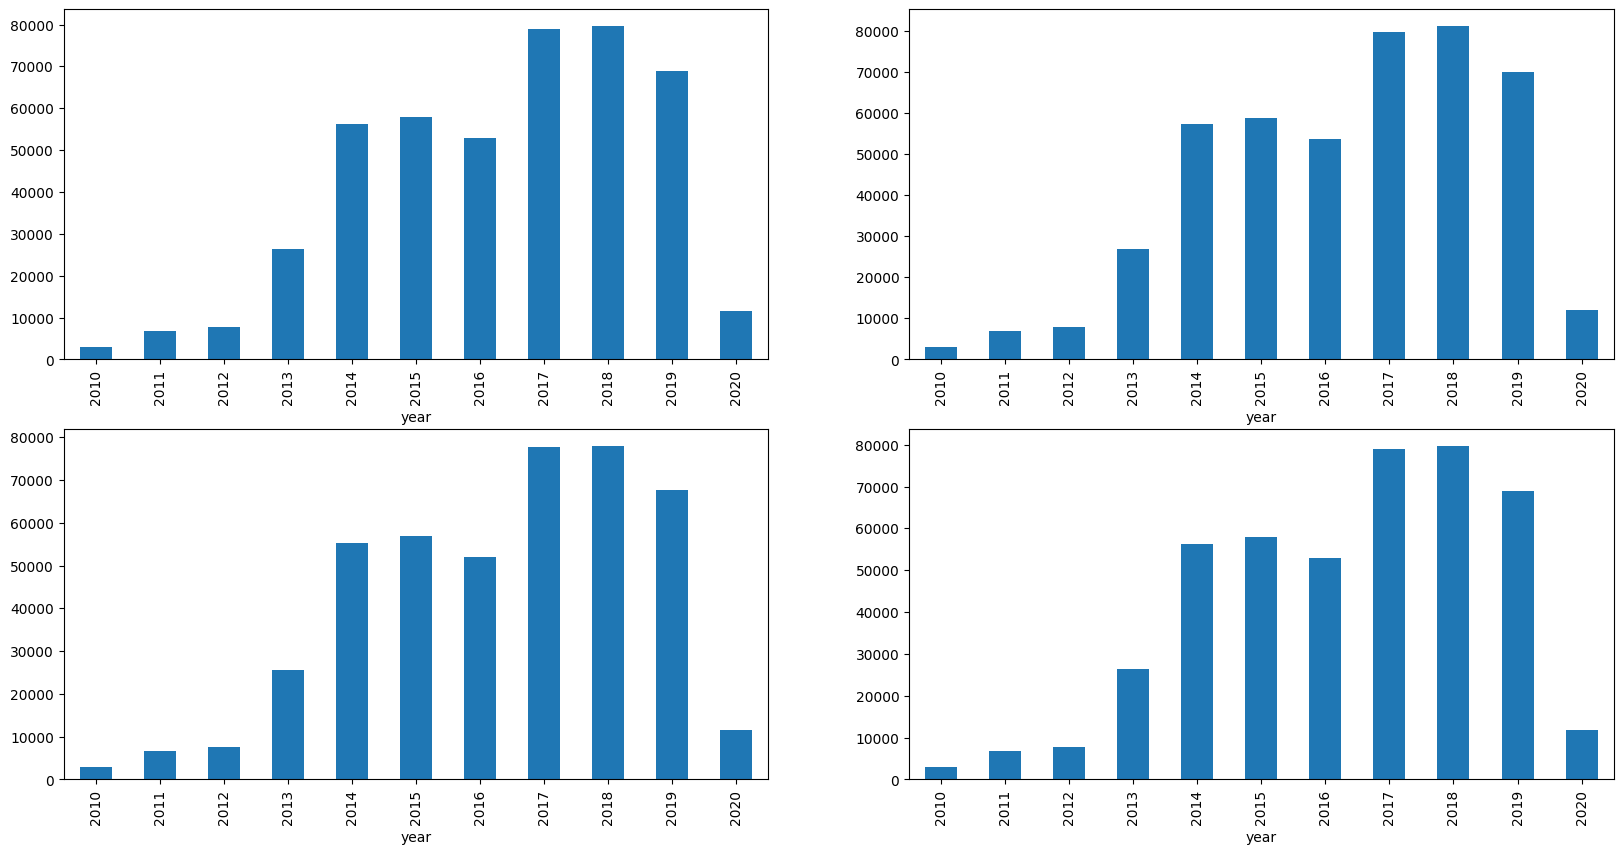

In [17]:
# Lets view the performance of every year first

data_grouped = df.groupby('year').sum()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2013 to that in 2014.

In [18]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


  - Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
  - The volume of trades is lower in the months which are quarter end.

In [19]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

Above I have added some more columns which will help in the training of our model. I have added the target feature which is a signal whether to buy or not I will train The model to predict this only. But before proceeding I will check whether the target is balanced or not using a pie chart.

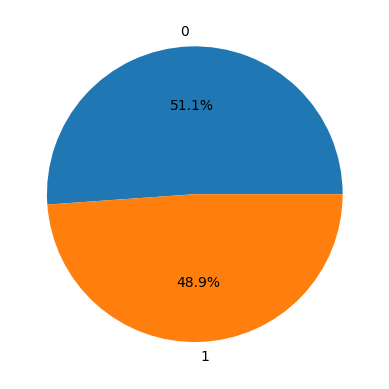

In [20]:
plt.pie(df['target'].value_counts().values, labels =[0,1], autopct = '%1.1f%%')
plt.show()

when adding Features to any dataset, we should be very careful they are not highly  correlated because they won't  help in the learning process of the alogarithm

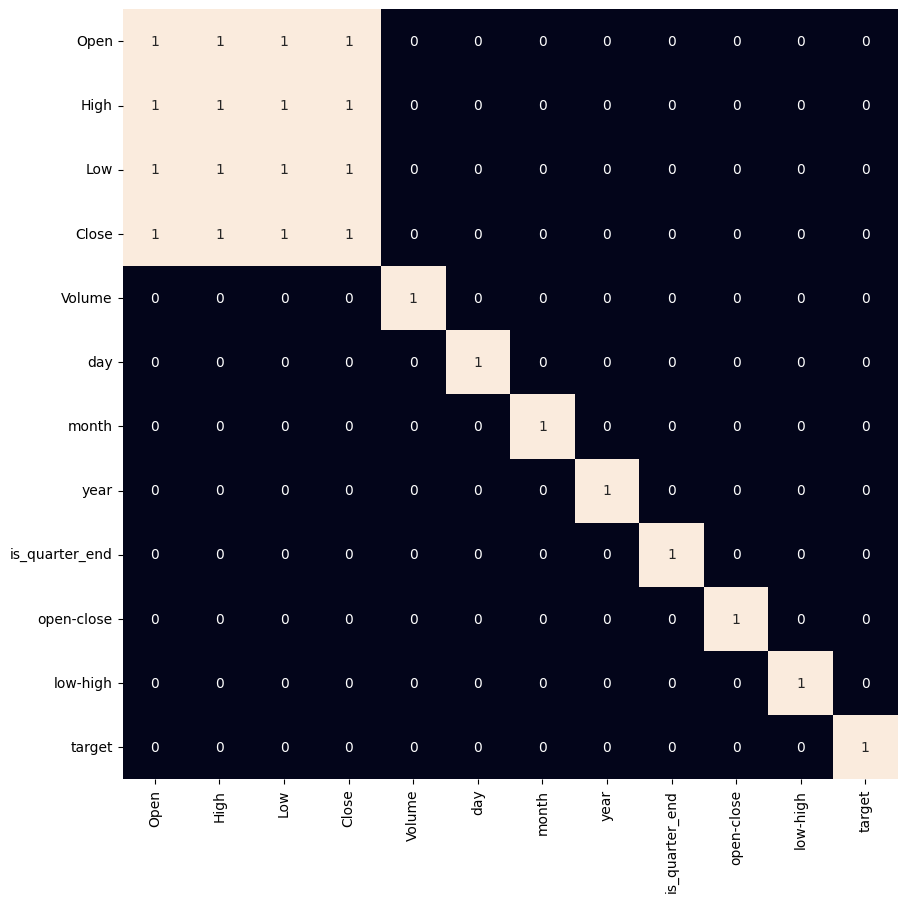

In [21]:
plt.figure(figsize=(10,10))
# because my concern is with only the with the highly correlated  features,
# i will only visualize that using a heatmap
sns.heatmap(df.corr()> 0.9, annot = True, cbar =False)
plt.show()

From the above heatmap, I can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that  I am good to go and build our model.

### Data Splitting and Normalization

In [22]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target  = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size = 0.1, random_state = 2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


## Model Development and Evaluation
I will Train models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data I will choose which ML model is serving the purpose at hand better.

for the evaluation metrics i will use the ROC-AUC Curve
  - This is because instead of predicting the hard probability that is 0 or 1 I would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [23]:
models = [LogisticRegression(), SVC(kernel = 'poly',
                                    probability = True), XGBClassifier(max_depth=3, learning_rate=0.1)]

model_names = ['Logistic Regression', 'SVC', 'XGBClassifier']

min_diff = float('inf')  # Initialize minimum difference as infinity
best_model = None  # Initialize best model as None

for i in range(3):
  models[i].fit(X_train, Y_train)
  training = metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1])
  validation = metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1])
  diff = abs(training - validation)  # Calculate absolute difference

  print(f'{model_names[i]} : ')
  print('Training Accuracy : ', training)
  print('Validation Accuracy : ', validation)
  print('Difference in accuracy of the training and validation : ', diff)
  print()

  # Update minimum difference and best model
  if diff < min_diff:
    min_diff = diff
    best_model = model_names[i]

print(f'The best performing model is {best_model} with a difference of {min_diff} between training and validation accuracy.')

Logistic Regression : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579
Difference in accuracy of the training and validation :  0.030543068255133865

SVC : 
Training Accuracy :  0.5294572363547078
Validation Accuracy :  0.46257525998905313
Difference in accuracy of the training and validation :  0.06688197636565463

XGBClassifier : 
Training Accuracy :  0.7113789439371425
Validation Accuracy :  0.5041050903119868
Difference in accuracy of the training and validation :  0.2072738536251557

The best performing model is Logistic Regression with a difference of 0.030543068255133865 between training and validation accuracy.


we find the logistic regression model is the best performing model in the training and testing and testing data.

Confusion Matrix


   0    1
0  1  115
1  3  123


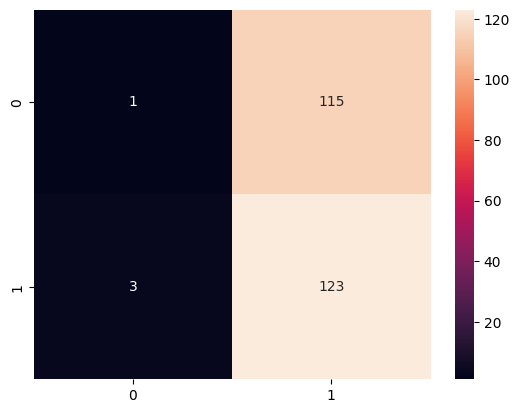

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_valid, models[1].predict(X_valid))
sns.heatmap(cm , annot=True, fmt='d')
cm_df = pd.DataFrame(cm)
print(cm_df)

From these values, we can calculate various performance metrics:

**Accuracy**: (TP + TN) / (TP + TN + FP + FN) = (123 + 1) / (123 + 1 + 115 + 3) = 0.51 or 51%. This is the proportion of correct predictions (both positive and negative) out of all predictions.

**Precision**: TP / (TP + FP) = 123 / (123 + 115) = 0.52 or 52%. This is the proportion of true positive predictions out of all positive predictions.

**Recall or Sensitivity**: TP / (TP + FN) = 123 / (123 + 3) = 0.98 or 98%. This is the proportion of true positive predictions out of all actual positive instances.

The Training Accuracy is 0.52 (**52%**) and the Validation Accuracy is 0.49 (**49%**). The difference between the training and validation accuracy is about 0.03 (3%), which suggests that the model is not overfitting significantly, as the performance on the training and validation sets is quite similar.

However, the overall accuracy of the model is quite low (around 50%), which suggests that the model’s predictions are not very accurate. mainly Due to luck of enough Comprihensive data



In [26]:
print(by)

Joseph Wathome
